In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from preprocess import preprocess

In [2]:
# Find X and y from the dataset
df = pd.read_csv('../dataset/body_level_classification_train.csv')
y = df['Body_Level']
X = df.drop(['Body_Level'], axis=1)

print(X.shape)
print(y.shape)

(1477, 16)
(1477,)


In [3]:
# Random oversample to make the minority class instances equal to the majority class instances
oversample = RandomOverSampler(sampling_strategy='not majority')
X_over, y_over = oversample.fit_resample(X, y)

X = pd.DataFrame(X_over, columns=X.columns)
y = y_over

print(X.shape[0])

2720


In [4]:
def countPlot(data=None, x=None, y=None, palette='bright', height=15, title=' ', subtitle=' ', description=' '):
    sns.set(style = 'whitegrid', rc = {'figure.figsize': (20,height)})
    g = sns.countplot(data=data, y=y, x=x, palette=palette)
    g.set_ylabel(' \n\n\n')
    g.set_xlabel(' \n\n\n\n\n')
    g.set_title(f'\n\n\n\n{title}\n\n'.upper(), loc = 'left', fontdict = dict(fontsize = 15, fontweight = 'bold'))
    g.set_yticklabels(
        [tick_label.get_text().title() for tick_label in g.get_yticklabels()],
        fontdict = dict(
            fontsize = 12.5,
            fontweight = 'medium'))
    
    plt.text(s = f'{description}',
             alpha = 0.5,
             x = 0,
             y = -.18,
             verticalalignment = 'baseline',
             horizontalalignment = 'left',
             transform = g.transAxes)
    
    g.bar_label(container = g.containers[0], padding = 10,)
    plt.text(s = ' ', x = 1.08, y = 1, transform = g.transAxes)
    sns.despine()
    return g

def piePlot(data=None, value='Percentage', name='Class', title=' ', subtitle=' ', description=' '):
    data_pie = pd.DataFrame(data.value_counts() / data.shape[0]*100).reset_index()
    data_pie.columns = [name, value]
    fig = px.pie(data_pie, values=value, names=name, title=title)
    fig.update_layout(title=title, title_x=0.48)
    fig.show()

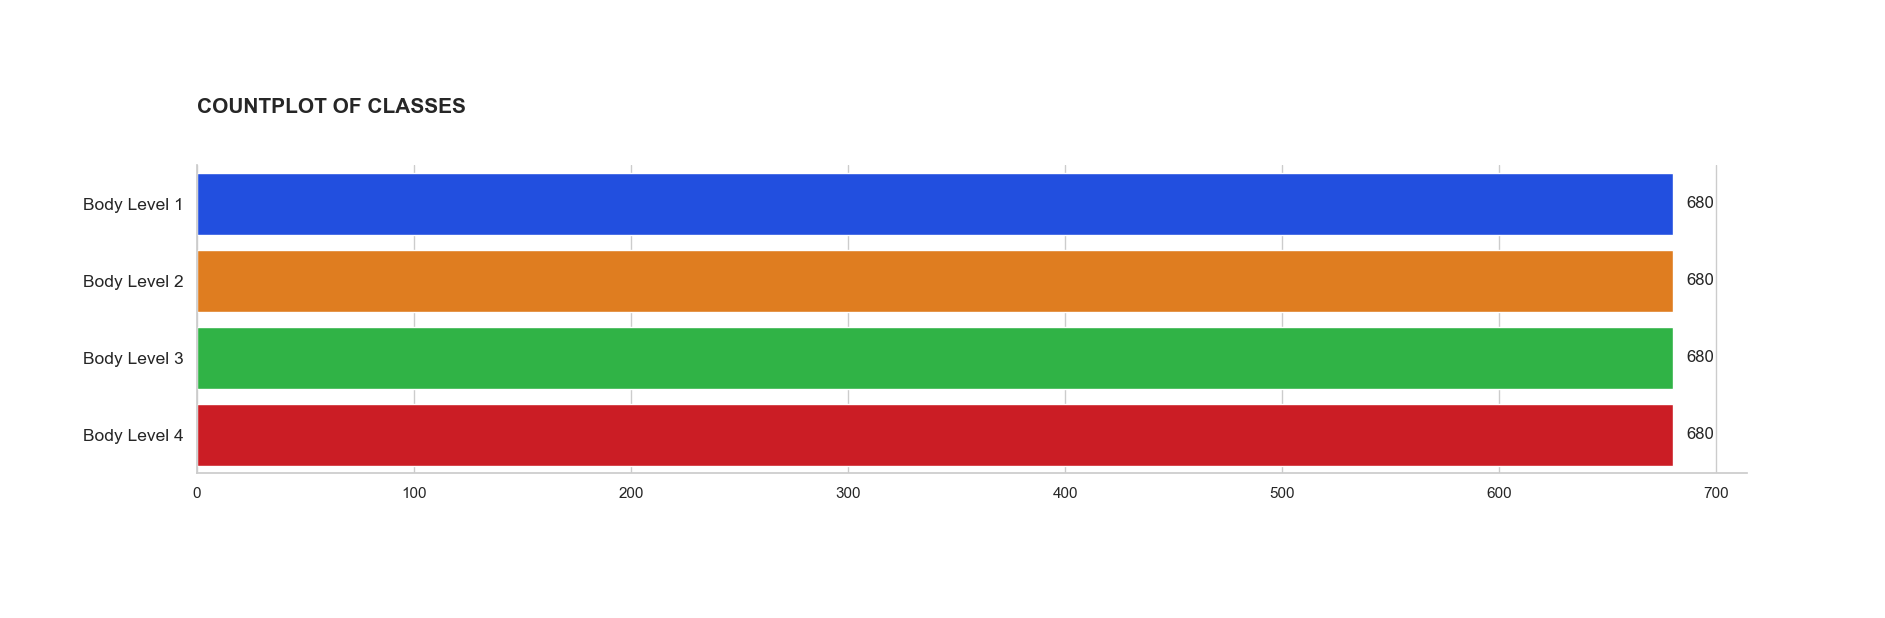

In [5]:
countPlot(y = y, title = 'Countplot of Classes', height = y.nunique())
piePlot(data = y, value = 'Percentage', name = 'Class', title = 'Class Distribution')  

In [6]:
df_preprocessed = preprocess(X, y)
df_preprocessed.head()

,Age,Height,Weight,H_Cal_Consump,Veg_Consump,Water_Consump,Alcohol_Consump,Smoking,Meal_Count,Food_Between_Meals,...,Phys_Act,Time_E_Dev,Gender_Female,Gender_Male,Transport_Automobile,Transport_Bike,Transport_Motorbike,Transport_Public_Transportation,Transport_Walking,Body_Level
0,-0.087912,0.283103,-0.918409,1,0.466846,-1.459077,3,0,0.341967,1,...,-0.360767,1.112605,1,0,0,0,0,1,0,1
1,-0.553175,0.501638,-0.796290,1,-0.721310,1.434958,2,0,0.677801,2,...,0.647577,2.074657,0,1,0,0,0,1,0,1
2,-0.887637,0.138500,-0.993826,1,-1.362040,-1.365948,2,0,0.867428,2,...,-0.787935,0.492469,1,0,0,0,0,1,0,1
3,-0.687236,-0.043388,-0.998006,1,-2.130956,-1.477354,2,0,0.582378,2,...,1.010623,0.492469,1,0,0,0,0,1,0,1
4,-0.564993,1.012074,-0.665297,1,0.189990,0.200642,3,0,0.848057,2,...,1.040958,1.193898,0,1,1,0,0,0,0,1


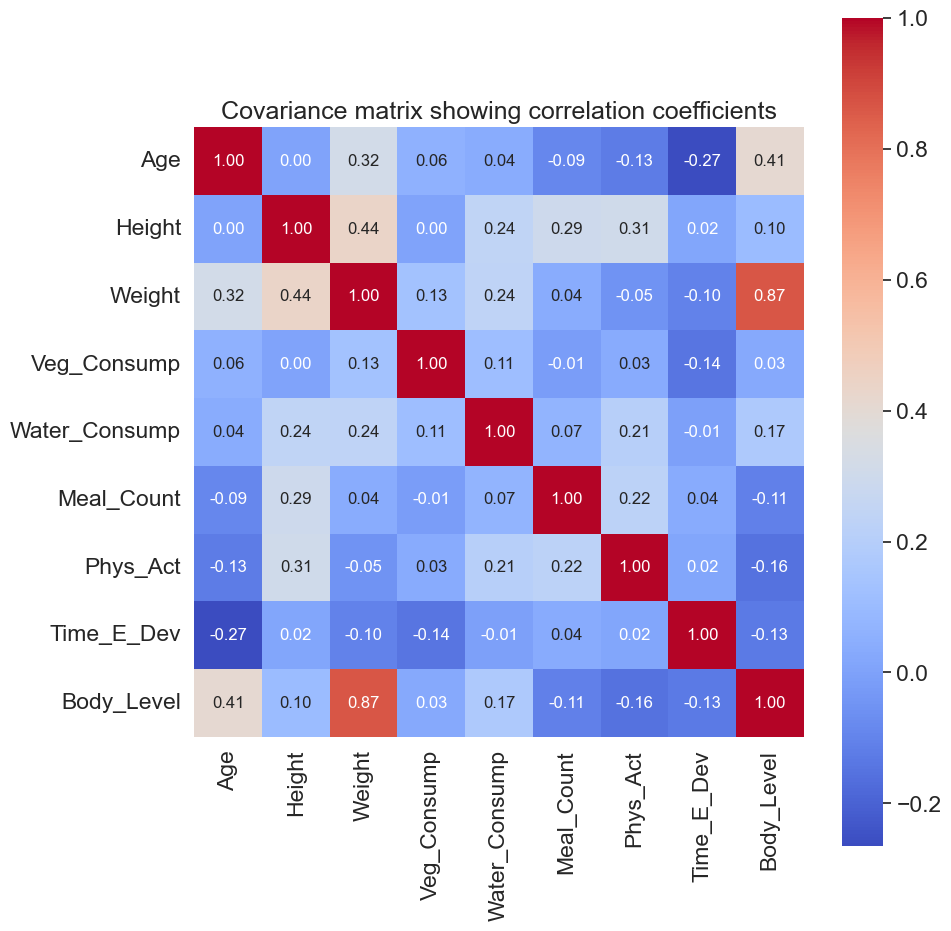

In [7]:
cols = df_preprocessed.select_dtypes(include=['float64']).columns.tolist()
cols.append('Body_Level')
temp_df = df_preprocessed.copy()
temp_df['Body_Level'] = StandardScaler().fit_transform(temp_df[['Body_Level']])
cov_mat = np.cov(temp_df[cols].values.T.astype(float))
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 cmap='coolwarm',                 
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients', size = 18)
plt.tight_layout()
plt.show()

In [8]:
cols = df_preprocessed.select_dtypes(include=['float64']).columns.tolist()

print("IQD outlier analysis")
for col in cols:
    IQD = df_preprocessed[col].quantile(0.75) - df_preprocessed[col].quantile(0.25)
    lower_boundary = df_preprocessed[col].quantile(0.25) - (IQD * 3)
    upper_boundary = df_preprocessed[col].quantile(0.75) + (IQD * 3)
    print(f'"{col}" attributes outliers are values less than {lower_boundary} or greater than {upper_boundary}')
    print(f'The number of outliers is {len([x for x in df_preprocessed[col].values if x < lower_boundary or x > upper_boundary])}')
    print('-------------------------------------------------------------------------------------------------')

IQD outlier analysis
"Age" attributes outliers are values less than -3.8050098474253375 or greater than 3.466961124081107
The number of outliers is 23
-------------------------------------------------------------------------------------------------
"Height" attributes outliers are values less than -5.305205631023939 or greater than 5.274486270150143
The number of outliers is 0
-------------------------------------------------------------------------------------------------
"Weight" attributes outliers are values less than -4.678314377051601 or greater than 4.3853750245023955
The number of outliers is 0
-------------------------------------------------------------------------------------------------
"Veg_Consump" attributes outliers are values less than -6.094171020368157 or greater than 6.442504071971253
The number of outliers is 0
-------------------------------------------------------------------------------------------------
"Water_Consump" attributes outliers are values less than -

In [9]:
df_preprocessed = df_preprocessed.drop(['Veg_Consump', 'Meal_Count'], axis=1)

# Save the preprocessed dataset
df_preprocessed.to_csv('../dataset/body_level_classification_train_preprocessed.csv', index=False)